# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**: Lucas Musciano

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [1]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Ejemplo de uso

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})

In [3]:
## Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,-1.476517,1.646994,-0.197607,1.619050,-0.314935,87.511099
1,0.896151,-1.296290,0.575096,0.240757,0.500753,-73.876709
2,1.786238,-0.077049,0.024569,-0.219089,0.709240,28.187164
3,-0.723827,-0.811958,2.230337,0.550314,-1.247340,-70.433813
4,0.014336,1.741810,-0.453845,-0.930252,1.470682,122.173598


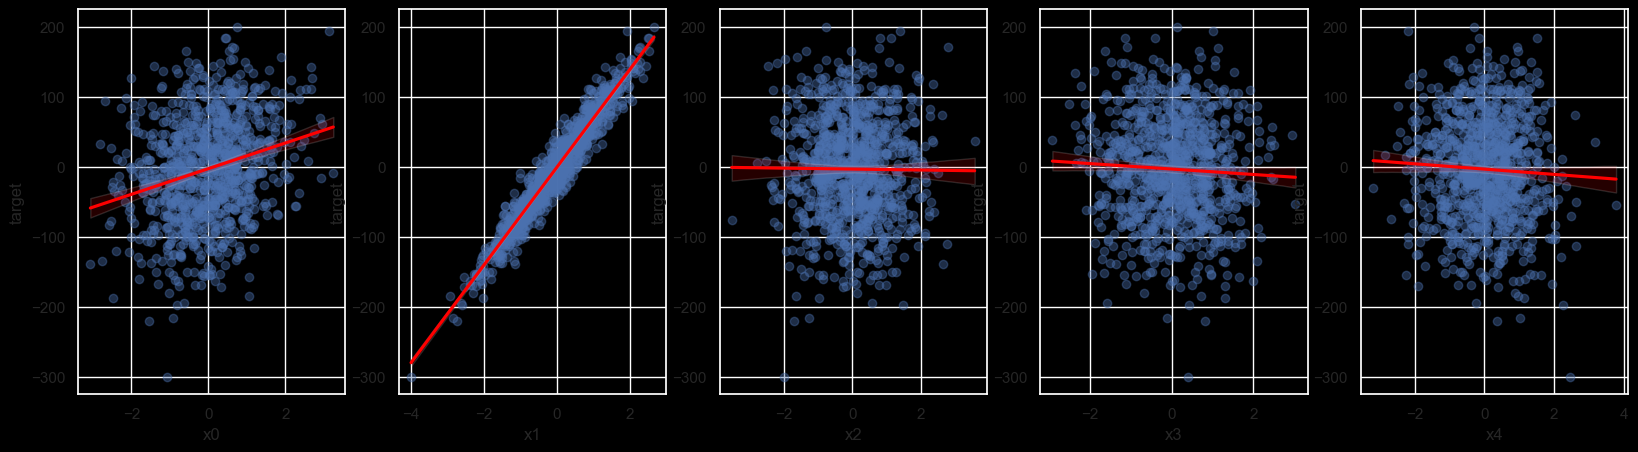

In [4]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:
for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)




Ahora agregamos _outliers_ a un nuevo dataset

In [5]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)


In [6]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

Text(0.5, 1.0, 'Outliers (one-tailed)')

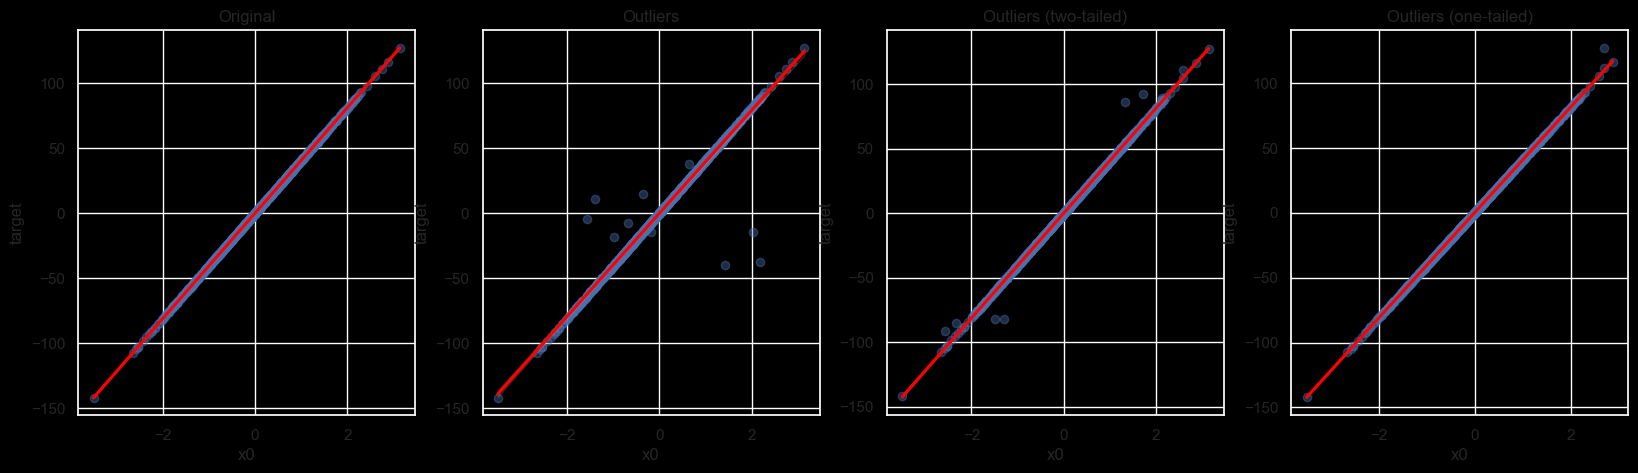

In [7]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')


Text(0.5, 1.0, 'Outliers')

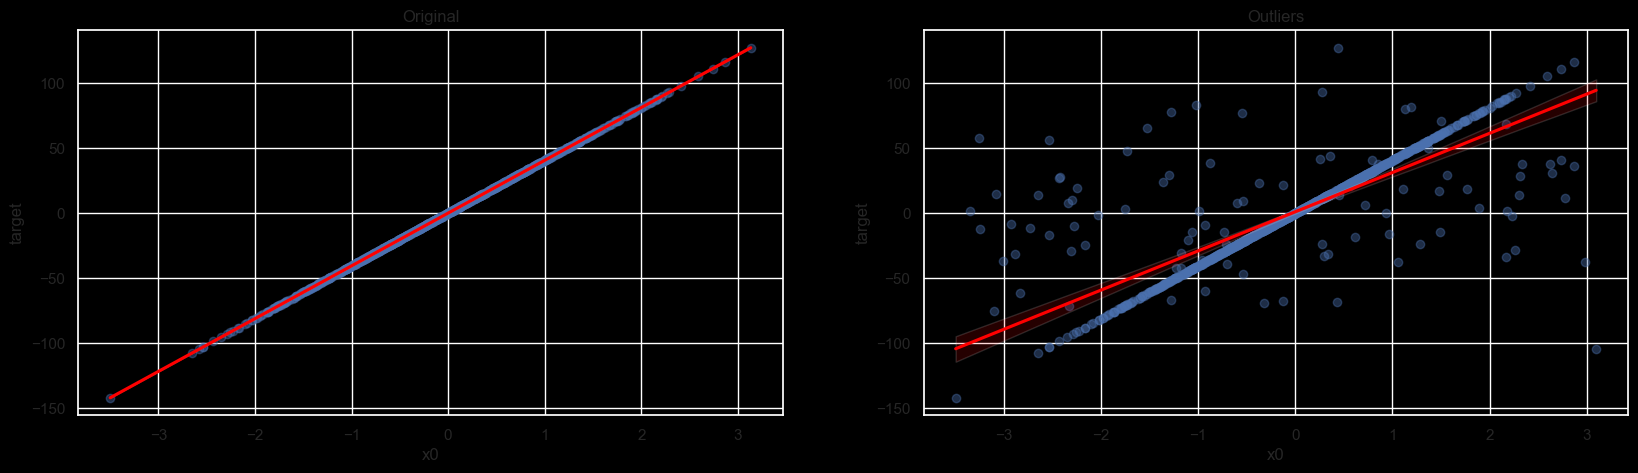

In [8]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')


### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test.


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [9]:
import numpy as np
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [107]:
## Parámetros de la simulación
n_exp = 10
n_samples = 1000
n_features = 10
n_informative = 2
n_targets = 1

noise = np.linspace(0, 100, 100, dtype=int)
bias = np.linspace(0, 100, 20, dtype=int)

coefs = []
ncoefs = []
RMSEs = []
MAEs = []
models = []

In [108]:
## Esqueleto de la simulación
for _ in tqdm(range(n_exp)):
    for b in bias:
        for n in noise:
            models.append(np.round([_, b, n],2))
            # Generamos el dataset:
            data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=n,
                bias=b,
                output='dataframe'
            )
            # Hacemos particiones test-train 70-30
            data_train = data[:int(len(data)*0.7)]
            data_test = data[int(len(data)*0.7):]
            # Separamos el target del dataframe general en ambos subsets
            X_train = data_train.drop("target",axis=1)
            y_train = data_train["target"]
            X_test = data_test.drop("target",axis = 1)
            y_test = data_test["target"]
            # Ajustamos un modelo de regresión lineal con los datos preparados
            linear_reg = LinearRegression()
            linear_reg.fit(X_train, y_train)
            # Guardamos lso coeficientes
            coefs.append(np.round(linear_reg.coef_[:n_informative],2).tolist())
            ncoefs.append(np.round(linear_reg.coef_[n_informative:],2).tolist())
            # Predecimos con el test y calculamos las métricas pedidas en el enunciado
            prediction = linear_reg.predict(X_test)
            RMSEs.append(mean_squared_error(y_test,prediction,squared=False))
            MAEs.append(mean_absolute_error(y_test,prediction))
        
        

#Creamos un dataframe para mostrar los datos por tabla
results_frame = pd.DataFrame({
    '[I,Bias,Noise]': models,
    'MAE': MAEs,
    'RMSE': RMSEs,
    'Info. Coefs': coefs,
    'Non-info. Coefs':ncoefs

})
pd.options.display.float_format = '{:.2f}'.format
results_frame.head(20)
        




100%|██████████| 10/10 [01:11<00:00,  7.19s/it]


,"[I,Bias,Noise]",MAE,RMSE,Info. Coefs,Non-info. Coefs
0,"[0, 0, 0]",0.00,0.00,"[20.52, 76.37]","[-0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0]"
1,"[0, 0, 1]",0.80,1.00,"[72.34, 97.3]","[-0.01, 0.05, -0.01, -0.05, 0.05, 0.03, -0.02,..."
2,"[0, 0, 2]",1.58,2.00,"[62.07, 19.61]","[-0.03, 0.07, -0.15, 0.02, -0.01, -0.03, -0.06..."
3,"[0, 0, 3]",2.41,3.01,"[67.8, 53.45]","[-0.02, -0.02, 0.11, 0.24, -0.02, -0.15, 0.05,..."
4,"[0, 0, 4]",3.10,3.85,"[36.09, 72.39]","[-0.0, -0.33, 0.01, -0.06, 0.12, 0.03, 0.13, 0..."
5,"[0, 0, 5]",3.92,5.05,"[78.47, 3.63]","[-0.18, 0.13, 0.08, 0.15, -0.24, -0.09, 0.29, ..."
6,"[0, 0, 6]",4.83,6.07,"[91.96, 37.97]","[0.1, 0.08, 0.15, -0.1, 0.22, 0.17, 0.24, 0.01]"
7,"[0, 0, 7]",5.57,7.03,"[73.92, 27.88]","[-0.07, -0.04, 0.28, -0.26, -0.54, 0.13, -0.25..."
8,"[0, 0, 8]",6.81,8.58,"[11.32, 91.52]","[-0.42, 0.42, 0.47, 0.15, 0.46, -0.11, -0.05, ..."
9,"[0, 0, 9]",6.99,8.73,"[51.28, 48.09]","[0.34, -0.24, 0.14, -0.43, -0.26, 0.07, 0.33, ..."



# Hipótesis

Observando los resultados en tabla (ordenándolos de forma descendiente en distintas iteraciones a medida que aumenta el sesgo y el ruido), podemos observar a simple vista una relación muy fuerte entre la distancia a cero de las variables no informativas, el ruido y sesgo, y las métricas de error utilizadas.

En otras palabras, las variables no informativas parecen no afectar a la regresión (sus coeficientes son cercanos a cero cuando los datos de la regresión no están muy sesgados y cuando hay poco ruido), y esto resulta en métricas de error más pequeñas, ya que estos coeficientes no aportan a la regresión (por lo que no la alejan de su valor óptimo para la predicción).

A continuación realizamos test de hipótesis en código para tener más seguridad acerca de esta hipótesis.

(Nótese que si se reduce el ruido/sesgo máximo en los pasos anteriores, la cantidad de tests de hipótesis pasados aumenta)

In [109]:
# Vamos a usar la libreria de scipy para tests de hipótesis
from scipy import stats

# Definimos un alfa relativamente alto ya que sólo queremos saber si los coeficientes no informativos
# se aproximan a cero
alpha = 0.1
# Inicializamos un dataframe para guardar los resultados

n_ncoefs = range(n_features - n_informative)
t_stats = []
p_values = []
rejected = []

# Iteramos sobre todos los coeficientes no informativos
for i in n_ncoefs:
    # Generamos una lista conteniendo el valor de el coeficiente i en cada iteración de la simulación
    ncoef_samples =(results_frame['Non-info. Coefs'].apply(
        lambda x: x[i]
    ))
    # Planteamos un test de hipótesis para verificar que la media del coeficiente es cero
    t_stat, p_value = stats.ttest_1samp(ncoef_samples, popmean=0)
    t_stats.append(t_stat)
    p_values.append(p_value)
    rejected.append(p_value < alpha)
    
hypo_test_results = pd.DataFrame({
                'NCoef': n_ncoefs,
                'Estadístico': t_stats,
                'P Value': p_values,
                'H0 Rechazada': rejected

    })
# Visualizamos los resultados
print(hypo_test_results)



   NCoef  Estadístico  P Value  H0 Rechazada
0      0        -0.82     0.41         False
1      1         1.89     0.06          True
2      2         1.11     0.27         False
3      3        -0.47     0.64         False
4      4        -0.27     0.79         False
5      5        -1.56     0.12         False
6      6        -0.87     0.38         False
7      7        -1.18     0.24         False


### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [116]:
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV

outlier_per = np.linspace(0.01, 0.1, 10, dtype=float)
simple_errs = []
huber_errs = []
ridge_errs = []

for o in outlier_per:
    # Generamos un dataset simple con 0.5 de noise
    data = generate_dataset(
            n_samples=1000,
            n_features=1,
            n_informative=1,
            n_targets=1,
            noise=0.5,
            output='dataframe'
            )
    
    data = generate_outliers(
        df=data,
        columns=['x0'],
        percentage=o,
        extreme_outliers=False
        )
    # Hacemos particiones test-train 70-30
    data_train = data[:int(len(data)*0.7)]
    data_test = data[int(len(data)*0.7):]
    # Separamos el target del dataframe general en ambos subsets
    X_train = data_train.drop("target",axis=1)
    y_train = data_train["target"]
    X_test = data_test.drop("target",axis = 1)
    y_test = data_test["target"]

    # Ajustamos los modelos
    simple_reg = LinearRegression()
    huber_reg = HuberRegressor()
    ridge_reg = RidgeCV()
    linear_reg.fit(X_train, y_train)
    huber_reg.fit(X_train, y_train)
    ridge_reg.fit(X_train,y_train)
    
    # Predecimos con el test y calculamos las métricas pedidas en el enunciado
    simple_pred = linear_reg.predict(X_test)
    huber_pred = huber_reg.predict(X_test)
    ridge_pred = ridge_reg.predict(X_test)
    
    # Guardamos los errores para mostrarlos
    simple_errs.append([round(mean_squared_error(y_test,simple_pred,squared=False),2),
                        round(mean_absolute_error(y_test,simple_pred),2)])
    huber_errs.append([round(mean_squared_error(y_test,huber_pred,squared=False),2),
                        round(mean_absolute_error(y_test,huber_pred),2)])
    ridge_errs.append([round(mean_squared_error(y_test,ridge_pred,squared=False),2),
                        round(mean_absolute_error(y_test,ridge_pred),2)])

# Mostramos resultados por tabla
results_frame = pd.DataFrame({
    '% Outliers': outlier_per,
    'Simple Errors': simple_errs,
    'Huber Errors': huber_errs,
    'Ridge Errors': ridge_errs

})

results_frame.head(10)
    



,% Outliers,Simple Errors,Huber Errors,Ridge Errors
0,0.01,"[2.2, 0.7]","[2.21, 0.54]","[2.2, 0.7]"
1,0.02,"[21.66, 8.3]","[21.65, 2.84]","[21.69, 8.41]"
2,0.03,"[8.25, 3.04]","[8.59, 1.72]","[8.25, 3.06]"
3,0.04,"[2.87, 1.33]","[3.06, 0.87]","[2.87, 1.34]"
4,0.05,"[34.57, 13.42]","[36.68, 7.46]","[34.56, 13.47]"
5,0.06,"[21.68, 10.55]","[22.43, 4.64]","[21.69, 10.59]"
6,0.07,"[50.31, 23.95]","[52.89, 13.28]","[50.31, 24.02]"
7,0.08,"[25.11, 12.97]","[27.53, 7.97]","[25.1, 13.0]"
8,0.09,"[59.12, 29.7]","[67.64, 18.92]","[59.1, 29.75]"
9,0.10,"[62.4, 31.13]","[70.8, 17.98]","[62.39, 31.18]"


## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [13]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """
    N = len(y)
    y_hat = X.dot(theta)

    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad


Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

 43%|████▎     | 433/1000 [00:00<00:00, 43317.60it/s]

[-1.55831357 20.28209429]


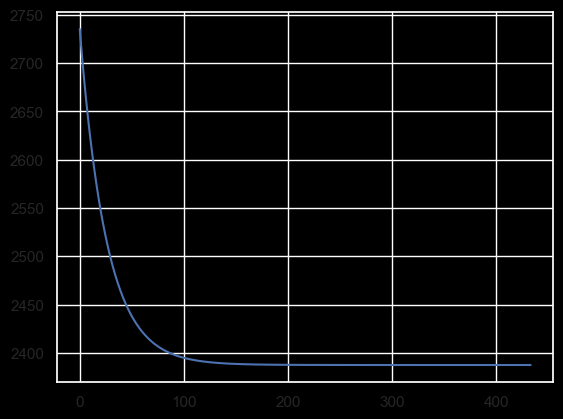

In [176]:
def GD(X, y, max_epochs=1000, tolerance=1e-6, learning_rate=0.01):
    # Comenzamos con theta random
    theta = np.ones(X.shape[1])

    loss_history = []
    
    for epoch in tqdm(range(max_epochs)):
        # Calculamos el gradiente
        grad = gradient(X, y, theta)

        # Actualizamos theta según el gradiente
        theta = theta - learning_rate * grad

        # Calculamos y almacenamos la pérdida:
        loss_history.append(np.mean((y-X.dot(theta)) ** 2))

        # Vemos si hay que frenar por tolerancia
        if len(loss_history) > 1 and abs(loss_history[-1] - loss_history[-2]) < tolerance:
            break

    return theta, loss_history

# Generamos el dataset
X, y = generate_dataset(
            n_samples=1000,
            n_features=1,
            n_informative=1,
            n_targets=1,
            noise=50,
            output='array'
            )
X_aux = np.c_[np.ones((X.shape[0], 1)), X]


theta_opt, loss_history = GD(X_aux, y)
# Nótese que la condición de tolerancia suele llegar antes que la de épocas, por lo que
# la progressbar casi nunca llega al 100% en las ejecuciones (varía según los datos generados, claro).
plt.plot(loss_history)




#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

 36%|███▌      | 362/1000 [00:00<00:00, 29935.69it/s]


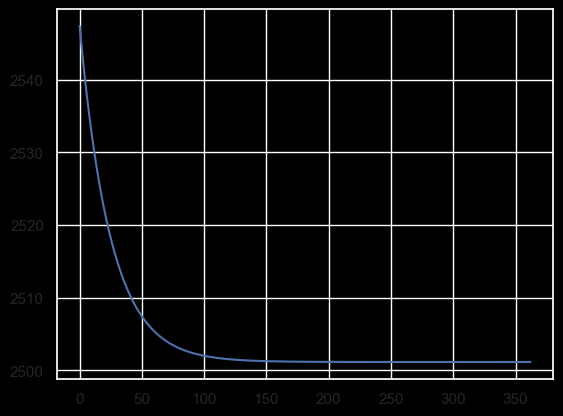

In [177]:
# Realizamos una réplica del bloque de código anterior pero editando el algoritmo para que sea un SGD en vez de un GD

def SGD(X, y, learning_rate=0.01, max_epochs=100, tolerance=1e-6):
    # Comenzamos con theta random
    theta = np.ones(X.shape[1])

    loss_history = []
    
    m = len(y)
    for epoch in tqdm(range(max_epochs)):
        # Reordenamos aleatoriamente los indices
        idxs = np.random.permutation(m)
        for i in idxs:
            xi = X[i:i+1]
            yi = y[i:i+1]
            # Calculamos el gradiente para el ejemplo aleatorio
            grad = gradient(xi,yi,theta)
            #Actualizamos theta
            theta = theta - learning_rate * grad
        
        # Calculamos y almacenamos la función de pérdida
        loss_history.append(np.mean((y-X.dot(theta)) ** 2))

        # Vemos si hay que frenar por tolerancia
        if len(loss_history) > 1 and abs(loss_history[-1] - loss_history[-2]) < tolerance:
            break

    return theta, loss_history

# Generamos el dataset
X, y = generate_dataset(
            n_samples=1000,
            n_features=1,
            n_informative=1,
            n_targets=1,
            noise=50,
            output='array'
            )
X_aux = np.c_[np.ones((X.shape[0], 1)), X]


theta_opt, loss_history = GD(X_aux, y)
# Nótese que la condición de tolerancia suele llegar antes que la de épocas, por lo que
# la progressbar casi nunca llega al 100% en las ejecuciones (varía según los datos generados, claro).
plt.plot(loss_history)
    


Analice:

1. Cómo se comportan estos algoritmos? se puede ver la diferencia entre SGD y GD?.
2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.
3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?

1- Según las pruebas hechas con diferentes datasets, parece ser que SGD converge con mayor velocidad que el GD tradicional, aunque esta convergencia puede ser más ruidosa. (También es sabido que la variante estocástica suele ser más sensible a cambios de parámetros como el learning rate, necesitando una selección más cuidadosa).

2- Realizando la simulación con variantes del lr, se puede observar overshoots cuando son valores muy grandes (tal y como vimos en clase). Como el problema utilizado no tiene mínimos locales (1 sola feature lleva a un gráfico de parámetros parabólico muy simple, con solo un mínimo absoluto) los valores muy pequeños de alfa no terminan en undershooting en sí, si no que es posible alcanzar el límite de épocas sin vencer la tolerancia por un avance muy pequeño en el descenso del gradiente.

3- Como se puede ver en las dos últimas celdas de código, los gráficos de historial de pérdida respecto a las épocas tienen una "velocidad" o "pendiente" mucho mayor en el caso estocástico, representando una convergencia más veloz, como se mencionó en el primer punto.